✅ Accuracy: 0.9623318385650225

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

📊 Confusion Matrix:
 [[965   0]
 [ 42 108]]


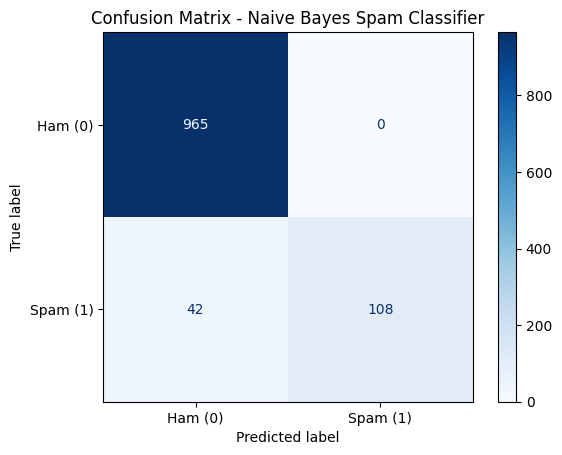

In [15]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# 3. Drop unnecessary columns and rename
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# 4. Encode labels (ham: 0, spam: 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 5. Split into features and labels
X = df['message']
y = df['label']

# 6. Text vectorization (convert text to numbers)
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# 7. Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# 8. Train Naive Bayes model
model = MultinomialNB()
model.fit(x_train, y_train)

# 9. Predict and evaluate
y_pred = model.predict(x_test)

# 10. Evaluation metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham (0)', 'Spam (1)'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes Spam Classifier")
plt.show()